In [100]:
# Library settings
import re
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print
from rich.console import Console

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
terminal_width = shutil.get_terminal_size().columns

In [ ]:
# Pengolahan Data
# 1 Editing
df = pd.read_csv("Electronic-Sales.csv")
print("----------Isi dataset---------")
print(df.head())
print(f"\n----------Dimensi dataset adalah: {df.shape}----------")

----------Isi dataset---------

Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled    Credit Card      5538.33      791.19         7   
1    Completed         Paypal       741.09      247.03         3   
2    Completed    Credit Card      1855.84      463.96         4   
3    Completed           Cash      3164.76      791.19         4   
4    Completed           Cash        41.50       20.75         2   

  Purchase Date Shipping Type              Add-ons Purchased  Add-on Total  
0    2024-03-20      Standard  Accessory,Accessory,Accessory         40.21  
1    2024-04-20     Overnight                   Impulse Item         26.09  
2    2023-10-17       Express                            NaN          0.00  
3    2024-08-09     Overnight      Impulse Item,Impulse Item         60.16  
4    2024-05-21       Express                      Accessory         35.56

----------Dimensi dataset adalah: ----------

AttributeError: 'str' object has no attribute 'soft_wrap'

In [ ]:
print("--------Statistika Deskriptif Data Kuantitatif--------")
print(df.describe())

--------Statistika Deskriptif Data Kuantitatif--------

Customer ID           Age        Rating   Total Price    Unit Price  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean   10483.526550     48.994100      3.093950   3180.133418    578.631867   
std     5631.732525     18.038745      1.223764   2544.978675    312.274076   
min     1000.000000     18.000000      1.000000     20.750000     20.750000   
25%     5478.000000     33.000000      2.000000   1139.680000    361.180000   
50%    10499.500000     49.000000      3.000000   2534.490000    463.960000   
75%    15504.000000     65.000000      4.000000   4639.600000    791.190000   
max    19998.000000     80.000000      5.000000  11396.800000   1139.680000   

           Quantity  Add-on Total  
count  20000.000000  20000.000000  
mean       5.485550     62.244848  
std        2.870854     58.058431  
min        1.000000      0.000000  
25%        3.000000      7.615000  
50%        5.000000     51.700000  
75%        8.000000     93.842500  
max       10.000000    292.770000

In [ ]:
print("\n --------Cek Isi Data-------")
print(df.info())

--------Cek Isi Data-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

None

In [ ]:
print("\n ----------Cek Null----------")
print(df.isnull().sum())
print("\n")
print("Jumlah duplikasi: ", df.duplicated().sum())

----------Cek Null----------

Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

Jumlah duplikasi:  0

In [ ]:
print("---CEK OUTLIER---")


def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=["string", "object"]).columns
print(f"Data kategorikal mencakup: {categorical_columns.to_list()}")
if len(numeric_columns) > 0:
    for column in numeric_columns:
        outliers = detect_outliers(df, column)
        if not outliers.empty:
            print(f"\nOutliers found in '{column}'")
        else:
            print(f"\nNo outliers found in '{column}' column.")

---CEK OUTLIER---

Data kategorikal mencakup: ['Gender', 'Loyalty Member', 'Product Type', 'SKU', 'Order Status', 'Payment Method', 
'Purchase Date', 'Shipping Type', 'Add-ons Purchased']

No outliers found in 'Customer ID' column.

No outliers found in 'Age' column.

No outliers found in 'Rating' column.

Outliers found in 'Total Price'

No outliers found in 'Unit Price' column.

No outliers found in 'Quantity' column.

Outliers found in 'Add-on Total'

--- VISUALISASI OUTLIER MENGGUNAKAN BOXPLOT ---

BOXPLOT VISUALIZATION

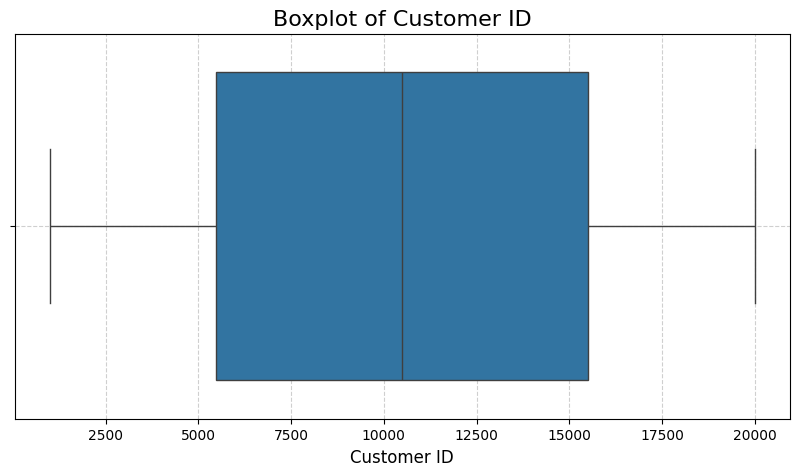

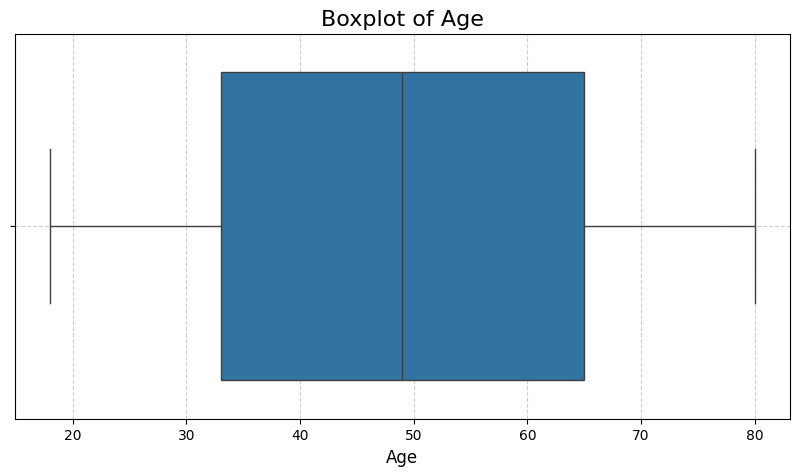

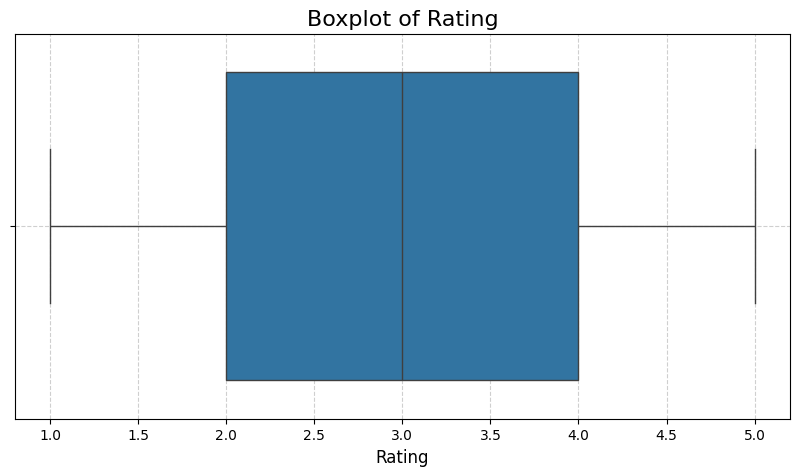

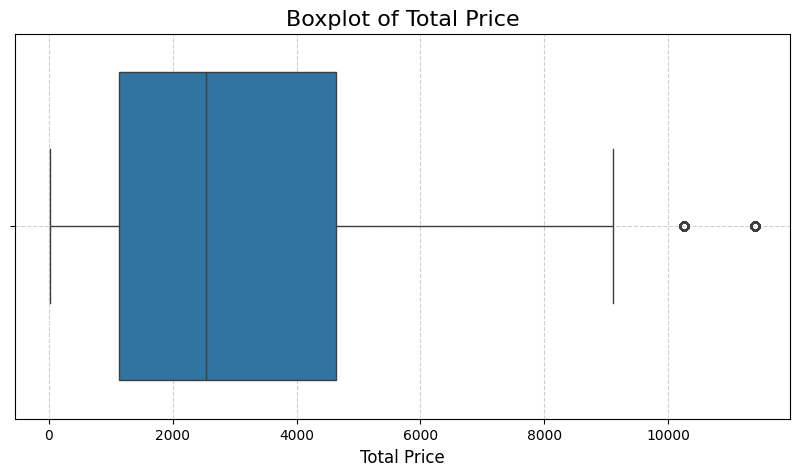

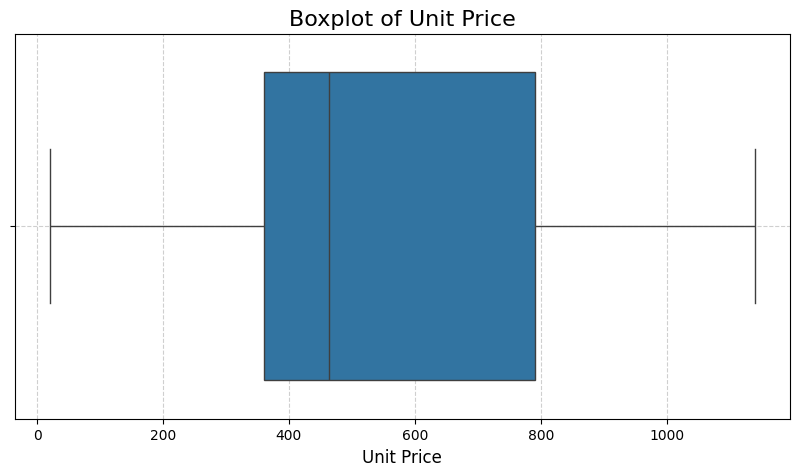

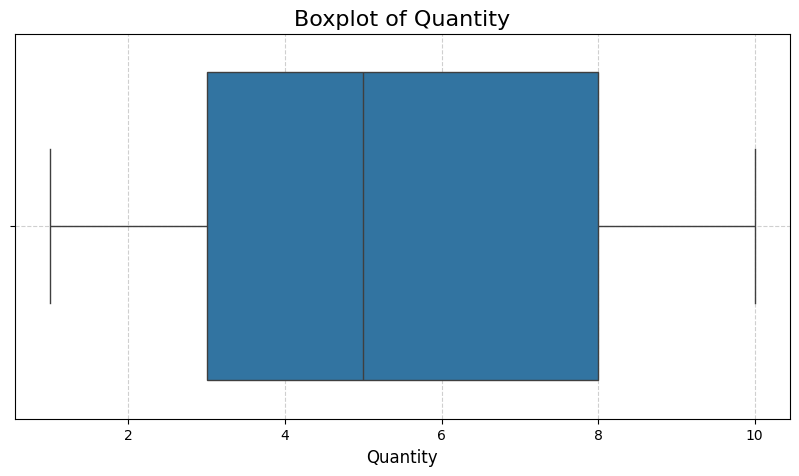

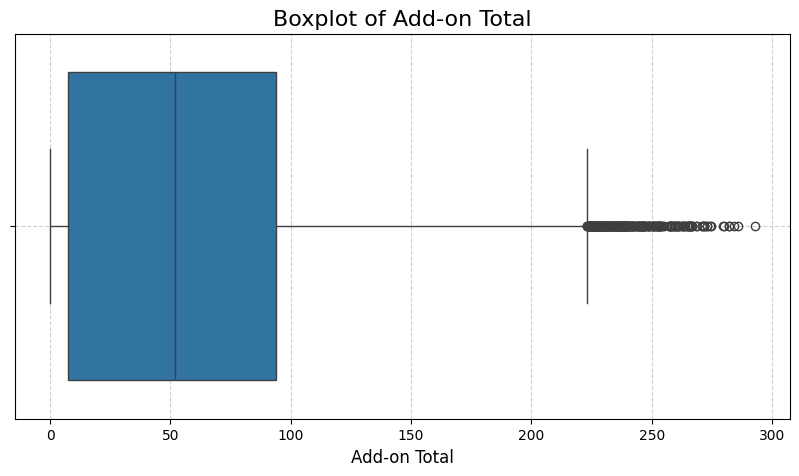

In [ ]:
print("\n--- VISUALISASI OUTLIER MENGGUNAKAN BOXPLOT ---")
title_text = "BOXPLOT VISUALIZATION"
print(title_text.center(terminal_width))

if len(numeric_columns) > 0:
    for column in numeric_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[column])
        plt.title(f"Boxplot of {column}", fontsize=16)
        plt.xlabel(column, fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()
else:
    print("No numeric columns to visualize.")